# 🌍 Final Project: Coding for Data Science 📊

## 🔍 **Title: Analyze Natural Disasters in Southeast Asia (2000-2024)** 
### *Predicting Future Natural Disasters in Vietnam*

### 👥 Advisors:
- **Mr. Phạm Trọng Nghĩa**  
- **Mr. Lê Ngọc Thành**  
- **Mr. Vũ Công Thành**  

### 🎓 Students:
- **Trần Trường Giang** - 22120085  
- **Lê Đại Hòa** - 22120108  
- **Lê Hoàng Vũ** - 22120461


# A. INTRODUCTION

This notebook is the result of a Data Science project where we processed with datasets of **natural disasters occured in the area of Southeast Asia from 2000 to the early 2024**. We aimed to **reviewing** the recent circumstance of the local area in the last 2 decades, **withdrawing** valuable conclusions, **visualizing** some noteworthy parts and last but not least: **giving** some promising predictions.

# B. ABOUT THE DATA

We decided to approach this project by the dataset of [EM-DAT](https://www.emdat.be/). **EM-DAT** (Emergency Events Database) is a global database of disasters developed by the Center for Research on the Epidemiology of Disasters (CRED). The main objective of EM-DAT is to **record and provide comprehensive information** about major natural and man-made disasters worldwide, ranging from climate-related events (hurricanes, floods, droughts, etc.) to industrial accidents and armed conflicts.

EM-DAT is an important resource for researchers, governments, and international organizations when studying and preparing for disasters. However, it's **noteworthy** that this database records events based on criteria such as:

    - At least 10 deaths (including dead and missing).
    - At least 100 people affected.
    - International assistance is required or an emergency declaration is requested from the government.
    - The level of disasters
    - And so on

# C. IMPLEMENT

## 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2. Data collection

## 3. Data preprocessing and exploration

In [3]:
df = pd.read_excel('..\data\disaster_sea.xlsx')
df.head(5)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0038-PHL,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,4080.0,7219.0,56.514291,"[{""adm2_code"":24275,""adm2_name"":""Agusan Del No...",2004-10-27,2023-09-25
1,2000-0066-PHL,No,nat-hyd-flo-coa,Natural,Hydrological,Flood,Coastal flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":24203,""adm2_name"":""Tawi-tawi""}]",2003-07-01,2023-09-25
2,2000-0082-IDN,No,nat-hyd-mmw-mud,Natural,Hydrological,Mass movement (wet),Mudslide,NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,11600.0,20526.0,56.514291,"[{""adm2_code"":18035,""adm2_name"":""Brebes""}]",2005-07-21,2023-09-25
3,2000-0089-PHL,No,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mt. Mayon,PHL,...,NaN,NaN,NaN,NaN,2214.0,3918.0,56.514291,"[{""adm2_code"":24240,""adm2_name"":""Albay""}]",2005-06-01,2023-09-25
4,2000-0108-IDN,No,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Dengue fever,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25


### 3.0 How many rows and columns are there in the dataset?

In [4]:
df.shape

(1278, 46)

### 3.1 Explore rows

### 3.2 Explore columns

In [5]:
from IPython.display import display
# Hiển thị toàn bộ nội dung của cột
pd.set_option('display.max_colwidth', None)  

df_info = pd.read_csv('..\data/attributes.csv')
df_info

,Column name,Description,Explanation
0,Dis No.,"A unique 8-digit identifier including the year (4 digits) and a sequential number (4 digits) for each disaster event (i.e., 2004-0659). In the EM-DAT Public Table, the ISO country code is appended.","Dis No.: A unique 8-digit identifier including the year (4 digits) and a sequential number (4 digits) for each disaster event (i.e., 2004-0659). In the EM-DAT Public Table, the ISO country code is appended.;"
1,Historic,"Binary field specifying whether or not the disaster happened before 2000, using the Start Year. Data before 2000 should be considered of lesser quality","Historic: Binary field specifying whether or not the disaster happened before 2000, using the Start Year. Data before 2000 should be considered of lesser quality;"
2,Classification Key,"A unique 15-character string identifying disasters in terms of the Group, Subgroup, Type and Subtype classification hierarchy.","Classification Key: A unique 15-character string identifying disasters in terms of the Group, Subgroup, Type and Subtype classification hierarchy.;"
3,Disaster Group,"The disaster group, i.e., “Natural” or “Technological.”","Disaster Group: The disaster group, i.e., “Natural” or “Technological.”;"
4,Disaster Subgroup,The disaster subgroup.,Disaster Subgroup: The disaster subgroup.;
5,Disaster Type,The disaster type.,Disaster Type: The disaster type.;
6,Disaster Subtype,The disaster subtype.,Disaster Subtype: The disaster subtype.;
7,External IDs,"List of identifiers for external resources (GLIDE, USGS, DFO), in the format “<source>:<identifier>” and separated by the pipe character (""|"").","External IDs: List of identifiers for external resources (GLIDE, USGS, DFO), in the format “<source>:<identifier>” and separated by the pipe character (""|"").;"
8,Event Name,"Short specification for disaster identification, e.g., storm names (e.g., “Mitch”), plane type in air crash (e.g., “Boeing 707”), disease name (e.g., “Cholera”), or volcano name (e.g., “Etna”).","Event Name: Short specification for disaster identification, e.g., storm names (e.g., “Mitch”), plane type in air crash (e.g., “Boeing 707”), disease name (e.g., “Cholera”), or volcano name (e.g., “Etna”).;"
9,ISO,The International Organization for Standardization (ISO) 3-letter code referring to the Country. The ISO 3166 norm is used.,ISO: The International Organization for Standardization (ISO) 3-letter code referring to the Country. The ISO 3166 norm is used.;


### 3.3 Handle missing data & Convert data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     1278 non-null   object 
 1   Historic                                   1278 non-null   object 
 2   Classification Key                         1278 non-null   object 
 3   Disaster Group                             1278 non-null   object 
 4   Disaster Subgroup                          1278 non-null   object 
 5   Disaster Type                              1278 non-null   object 
 6   Disaster Subtype                           1278 non-null   object 
 7   External IDs                               286 non-null    object 
 8   Event Name                                 380 non-null    object 
 9   ISO                                        1278 non-null   object 
 10  Country                 

In [7]:
df.isnull().sum()

DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
External IDs                                  992
Event Name                                    898
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                       23
Origin                                        709
Associated Types                              799
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution ('000 US$)                  1194


### 3.4 Data distribution

#### 3.4.1 Bar chart
- How many types of disasters are present in this dataset?

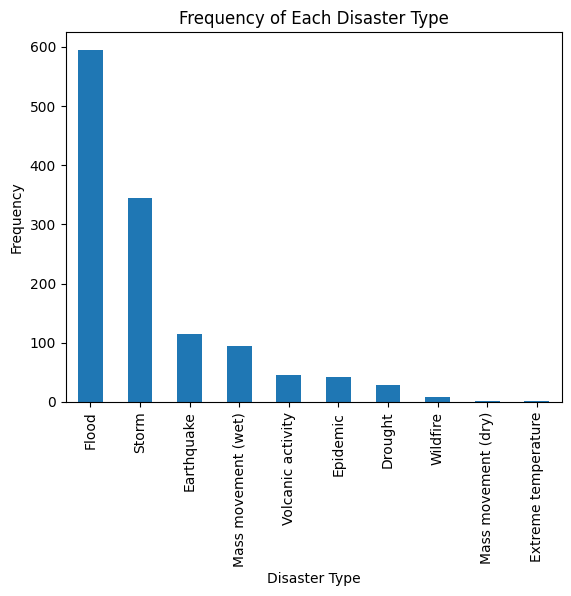

In [8]:
df['Disaster Type'].value_counts().plot(kind='bar')
plt.title('Frequency of Each Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.show()

> This dataset includes 10 types of disasters. And flood is the most popular disasters in Southeast Asia.

- How many countries are there in this dataset?

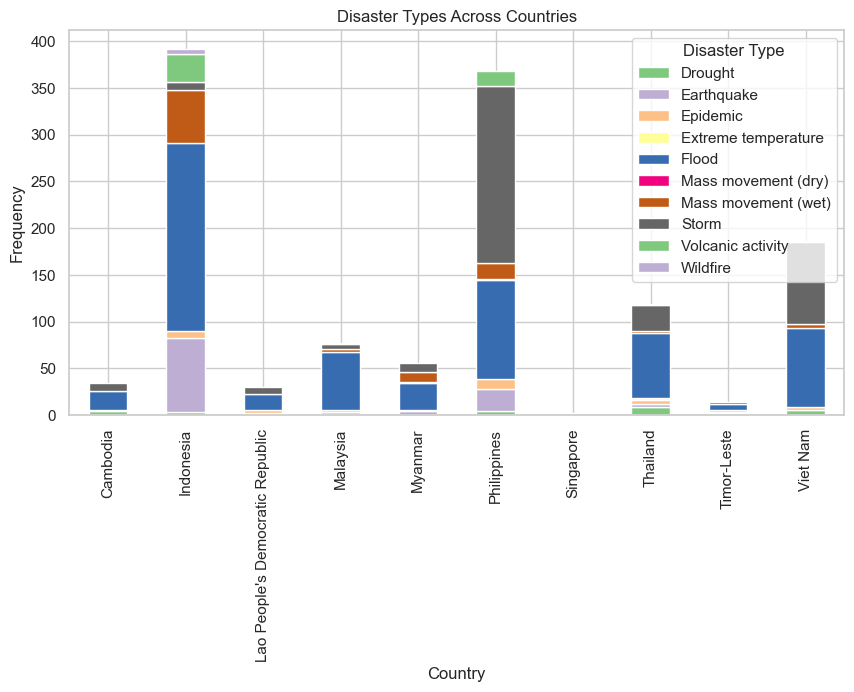

In [23]:
colors = plt.cm.Accent.colors[:10]

country_disaster = df.groupby(['Country', 'Disaster Type']).size().unstack()

country_disaster.plot(kind='bar', stacked=True, figsize=(10, 5), color=colors)

plt.title('Disaster Types Across Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.legend(title='Disaster Type')
plt.show()


> This data is consists of 11 countries in Southeast Asia. 

#### 3.4.2 Line chart
- Trends in disaster occurences over time.

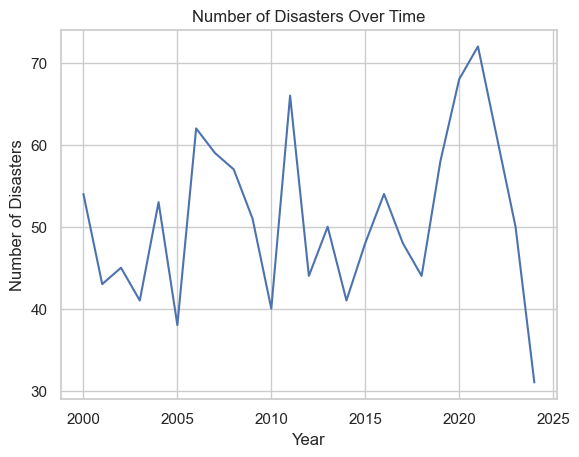

In [24]:
yearly_data = df.groupby('Start Year').size()
plt.plot(yearly_data.index, yearly_data.values)
plt.title('Number of Disasters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True)
plt.show()

> The number of disasters each year in Southeast Asia varies.

## 4. Question proposing & Answering

### 4.1 What are the most common types of natural disasters that occurred in Southeast Asia from 2000 to early 2024?
- (e.g., floods, typhoons, earthquakes, etc.)



### 4.2 What are the main causes of natural disasters in Southeast Asia, and how do they differ between regions?
- (e.g., climate change, tectonic activity, deforestation, etc.)



### 4.3 The level of impact of natural disasters varies across countries in Southeast Asia.
- (e.g., human, economic.)
- I will calculate the total number of affected people (injured, affected, homeless) (`Total Affected`) and the value of all economic losses directly or indirectly due to disaster (`Total Damage, Adjusted ('000 US$)`)
    




In [25]:
temp_df = df[df["Total Affected"].notnull() & df["Total Damage, Adjusted ('000 US$)"].notnull()]
countries_group = temp_df.groupby('Country')[["Total Affected", "Total Damage, Adjusted ('000 US$)"]].sum().reset_index()
countries_group

,Country,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,Cambodia,11686068.0,1854972.0
1,Indonesia,15679008.0,32469790.0
2,Lao People's Democratic Republic,1952542.0,595722.0
3,Malaysia,779606.0,4466015.0
4,Myanmar,6176749.0,8971041.0
5,Philippines,177930771.0,31278579.0
6,Thailand,57442536.0,61077199.0
7,Timor-Leste,11134.0,28688.0
8,Viet Nam,38320196.0,27608685.0


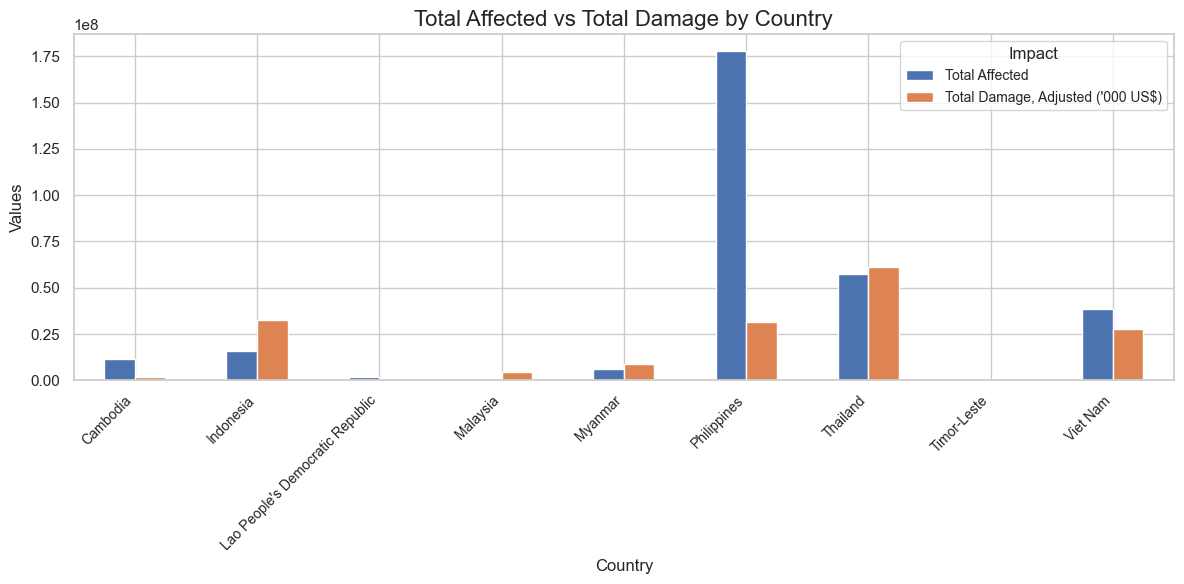

In [26]:
# Visualize
ax = countries_group.set_index('Country')[['Total Affected', "Total Damage, Adjusted ('000 US$)"]].plot(kind='bar', figsize=(12, 6))

plt.title('Total Affected vs Total Damage by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend(title='Impact', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()

- From the chart, we can see that the Philippines is the most affected by disasters, followed by Thailand, Indonesia, and Vietnam.
- This is because the Philippines is located in a region highly prone to typhoons, earthquakes, and volcanic eruptions. Its geographic location along the Pacific Ring of Fire and the typhoon belt makes it vulnerable to frequent natural disasters. Thailand, Indonesia, and Vietnam also face significant risks, including floods, earthquakes, and typhoons, but the frequency and intensity of these events are generally lower compared to the Philippines.


### 4.4 What is the trend of natural disaster occurrences over the years in Southeast Asia?
- (e.g., increasing, decreasing, or fluctuating patterns.)
- We will calculate the number disasters of each year and visualize to gain insights


In [27]:
year_group = df.groupby(by='Start Year').size().reset_index(name='Number of Disasters')
year_group

,Start Year,Number of Disasters
0,2000,54
1,2001,43
2,2002,45
3,2003,41
4,2004,53
5,2005,38
6,2006,62
7,2007,59
8,2008,57
9,2009,51


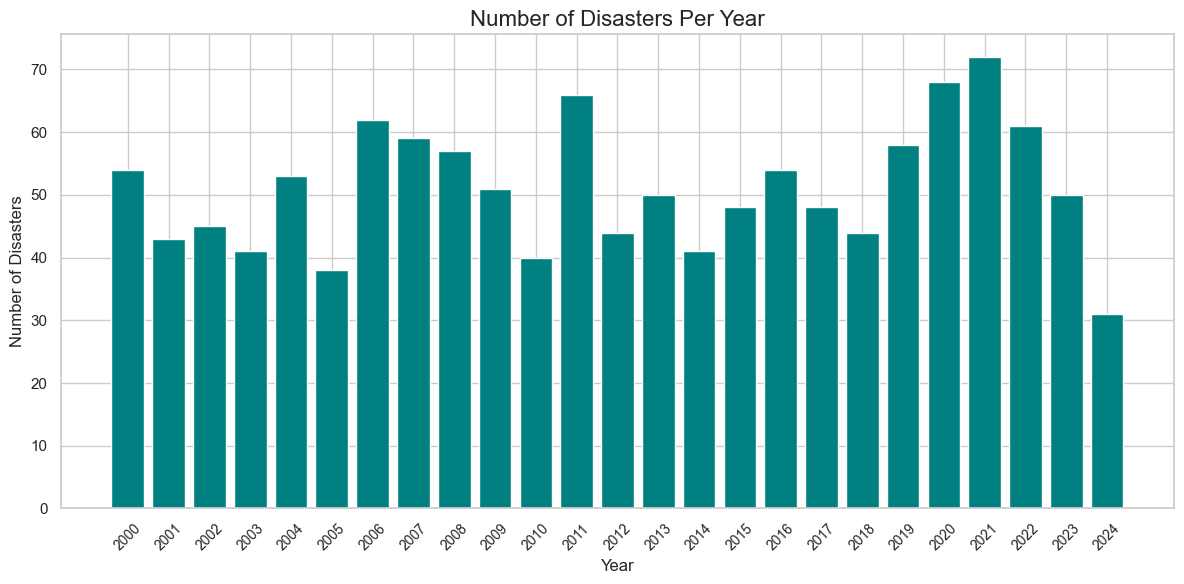

In [28]:
# Visualize
plt.figure(figsize=(12, 6))
plt.bar(year_group['Start Year'], year_group['Number of Disasters'], color='teal')

plt.title('Number of Disasters Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Disasters', fontsize=12)

plt.xticks(range(2000, 2025), rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

- The rise in disaster frequency recently suggests climate change could be influencing extreme weather patterns.

### 4.5 Which **provinces in Vietnam** have the most storms and floods in the last 3 years? From the result, give further remarks?

For this question, we don't need complicated preprocessing steps. Instead of that, we will filter out the necessary features as below:


In [9]:
# Read data from Excel file
df = pd.read_excel('..\data\disaster_sea.xlsx')

# Filter data for Vietnam based on ISO code 'VNMN'
df_vietnam = df[df['ISO'] == 'VNM']

# Ensure date, month, and year columns are present
if {'Start Year', 'Start Month', 'Start Day'}.issubset(df_vietnam.columns):
    # Convert time columns to datetime format
    df_vietnam['Start Date'] = pd.to_datetime(df_vietnam[['Start Year', 'Start Month', 'Start Day']].astype(str).agg('-'.join, axis=1), errors='coerce')

    # Filter data for the last three years
    current_year = pd.Timestamp.now().year
    df_recent_vietnam = df_vietnam[df_vietnam['Start Year'] >= (current_year - 3)]

    # Filter disasters that are storms and floods
    df_storms_floods = df_recent_vietnam[(df_recent_vietnam['Disaster Type'] == 'Storm') | (df_recent_vietnam['Disaster Type'] == 'Flood')]

    # Group by province and count occurrences of storms and floods
    province_counts = df_storms_floods['Location'].value_counts()

    # Convert results to DataFrame
    df_province_counts = province_counts.reset_index()
    df_province_counts.columns = ['Location', 'Count']

    # Print results
    print(df_province_counts)
else:
    print("The columns 'Start Year', 'Start Month', and 'Start Day' do not exist in the dataframe.")

                                                                                                                                             Location  \
0   Minh Luong Commune, Viet Tien (Van Ban District, Lao Cai province); Bac Quang (Ha Giang province); Tan Dong (Yen Bai Province), Ha Giang Province   
1                                                                                                               Thai Binh, Ha Nam, Nam Dinh provinces   
2                                         Dien Bien, Lao Cai, Ha Giang, Yen Bai, Cao Bang, Lang Son, Thai Nguyen, Bac Giang, Quang Ninh and Hai Phong   
3                                                                             Lao Cai, Yen Bai, Thai Nguyen, Phu Tho, Quang Ninh, and Hanoi provinces   
4                                                     Lao Cai, Yen Bai, Ha Giang, Cao Bang, Bac Kan, Tuyen Quang, Phu Tho, Thai Nguyen and Quang Ninh   
5                                                                                 

C:\Users\ACER\AppData\Local\Temp\ipykernel_19436\2297500568.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vietnam['Start Date'] = pd.to_datetime(df_vietnam[['Start Year', 'Start Month', 'Start Day']].astype(str).agg('-'.join, axis=1), errors='coerce')
C:\Users\ACER\AppData\Local\Temp\ipykernel_19436\2297500568.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vietnam['Start Date'] = pd.to_datetime(df_vietnam[['Start Year', 'Start Month', 'Start Day']].astype(str).agg('-'.join, axis=1), errors='coerce')


In [10]:
df_province_counts['Location']

0     Minh Luong Commune, Viet Tien (Van Ban District, Lao Cai province); Bac Quang (Ha Giang province); Tan Dong (Yen Bai Province), Ha Giang Province
1                                                                                                                 Thai Binh, Ha Nam, Nam Dinh provinces
2                                           Dien Bien, Lao Cai, Ha Giang, Yen Bai, Cao Bang, Lang Son, Thai Nguyen, Bac Giang, Quang Ninh and Hai Phong
3                                                                               Lao Cai, Yen Bai, Thai Nguyen, Phu Tho, Quang Ninh, and Hanoi provinces
4                                                       Lao Cai, Yen Bai, Ha Giang, Cao Bang, Bac Kan, Tuyen Quang, Phu Tho, Thai Nguyen and Quang Ninh
5                                                                                                      Quang Tri, Thua Thien Hue and Ha Tinh Provinces 
6                                                                                       

In [11]:
import unidecode

# Danh sách các tỉnh của Việt Nam 
vietnam_provinces = [
    'An Giang', 'Ba Ria - Vung Tau', 'Bac Giang', 'Bac Kan', 'Bac Lieu', 
    'Bac Ninh', 'Ben Tre', 'Binh Dinh', 'Binh Duong', 'Binh Phuoc', 
    'Binh Thuan', 'Ca Mau', 'Cao Bang', 'Dak Lak', 'Dak Nong', 
    'Dien Bien', 'Dong Nai', 'Dong Thap', 'Gia Lai', 'Ha Giang', 
    'Ha Nam', 'Ha Tinh', 'Hai Duong', 'Hai Phong', 'Ha Noi', 
    'Hau Giang', 'Ho Chi Minh', 'Hoa Binh', 'Hung Yen', 'Khanh Hoa', 
    'Kien Giang', 'Kon Tum', 'Lai Chau', 'Lam Dong', 'Lang Son', 
    'Lao Cai', 'Long An', 'Nam Dinh', 'Nghe An', 'Ninh Binh', 
    'Ninh Thuan', 'Phu Tho', 'Phu Yen', 'Quang Binh', 'Quang Nam', 
    'Quang Ngai', 'Quang Ninh', 'Quang Tri', 'Soc Trang', 'Son La', 
    'Tay Ninh', 'Thai Binh', 'Thai Nguyen', 'Thanh Hoa', 'Thua Thien Hue', 
    'Tien Giang', 'Tra Vinh', 'Tuyen Quang', 'Vinh Long', 'Vinh Phuc', 
    'Yen Bai', 'Da Nang'
]

def extract_provinces(location_str):
    # Tìm các tỉnh xuất hiện trong location
    found_provinces = [
        province for province in vietnam_provinces 
        if province in location_str
    ]
    
    return found_provinces

# Với df_province_counts, dùng hàm extract_provinces để tạo ra cột 'Extracted_Provinces' từ cột 'Location'
df_province_counts['Extracted_Provinces'] = df_province_counts['Location'].apply(extract_provinces)

In [12]:
df_province_counts['Extracted_Provinces']

0                                                                                   [Ha Giang, Lao Cai, Yen Bai]
1                                                                                  [Ha Nam, Nam Dinh, Thai Binh]
2     [Bac Giang, Cao Bang, Dien Bien, Ha Giang, Hai Phong, Lang Son, Lao Cai, Quang Ninh, Thai Nguyen, Yen Bai]
3                                                           [Lao Cai, Phu Tho, Quang Ninh, Thai Nguyen, Yen Bai]
4                 [Bac Kan, Cao Bang, Ha Giang, Lao Cai, Phu Tho, Quang Ninh, Thai Nguyen, Tuyen Quang, Yen Bai]
5                                                                           [Ha Tinh, Quang Tri, Thua Thien Hue]
6                                                                            [Thai Nguyen, Tuyen Quang, Yen Bai]
7             [Dak Lak, Dak Nong, Dien Bien, Gia Lai, Lai Chau, Lam Dong, Lao Cai, Son La, Thai Nguyen, Yen Bai]
8                                                                               [Bac Lieu, Binh 

In [13]:
# Make a list of provinces from 'Extracted_Provinces'
province_series = df_province_counts['Extracted_Provinces'].explode()

# Count the appearances of each province
province_counts = province_series.value_counts(sort=True)

# Print the result
print(province_counts)

Extracted_Provinces
Yen Bai           9
Thai Nguyen       8
Lao Cai           7
Cao Bang          7
Ha Giang          6
Tuyen Quang       6
Quang Ngai        5
Quang Nam         5
Dien Bien         5
Bac Kan           4
Thua Thien Hue    4
Quang Tri         4
Quang Ninh        4
Phu Tho           4
Dak Lak           3
Lang Son          2
Phu Yen           2
Binh Duong        2
Kon Tum           2
Lam Dong          2
Da Nang           2
Nghe An           1
Vinh Phuc         1
Hoa Binh          1
Ha Nam            1
Quang Binh        1
Nam Dinh          1
Kien Giang        1
Ha Tinh           1
Binh Thuan        1
Bac Lieu          1
Son La            1
Lai Chau          1
Gia Lai           1
Dak Nong          1
Thai Binh         1
Bac Giang         1
Hai Phong         1
Binh Dinh         1
Name: count, dtype: int64


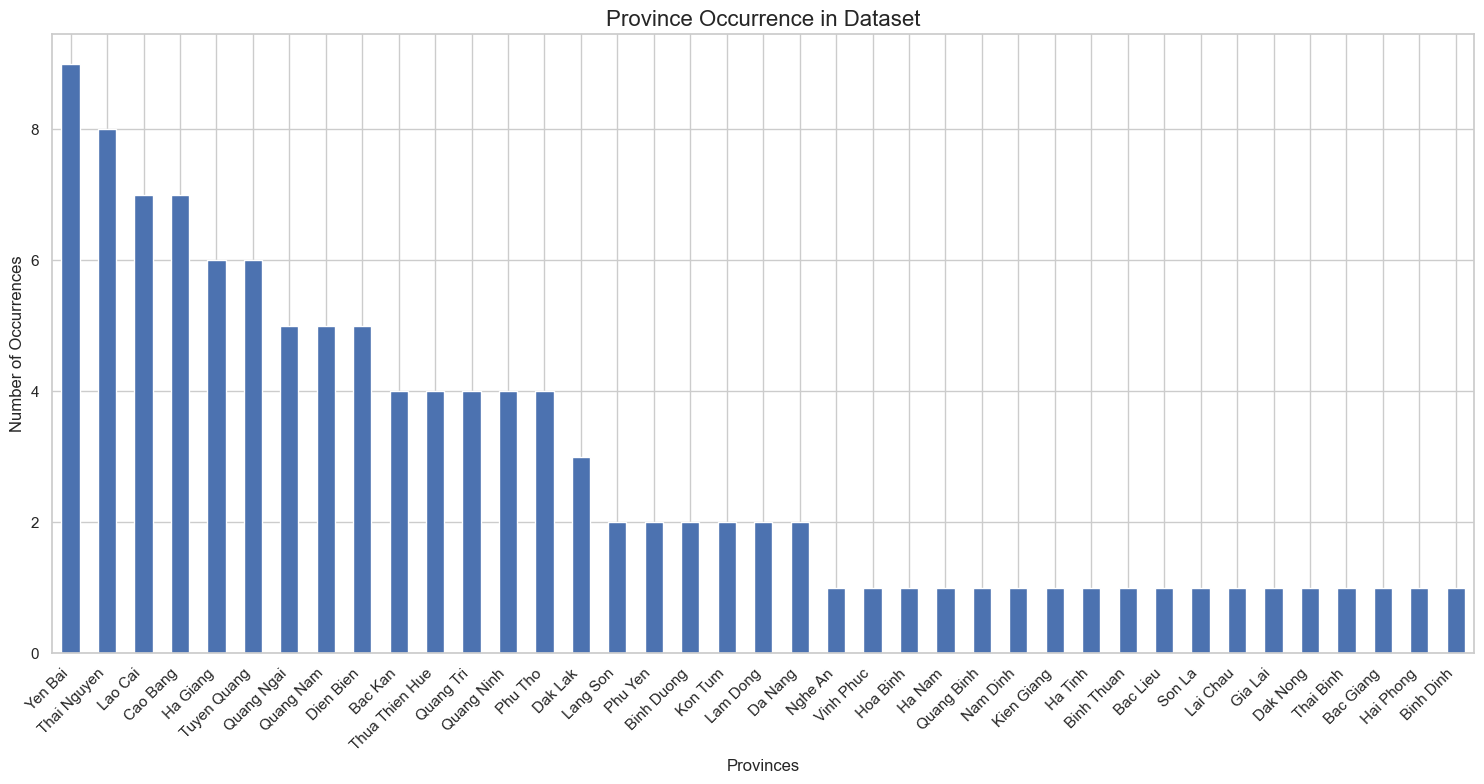

In [14]:
# Set the style
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

# Create a bar plot
province_counts.plot(kind='bar')

# Customize the plot
plt.title('Province Occurrence in Dataset', fontsize=16)
plt.xlabel('Provinces', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

> ## REMARK 1:

As we can see from the result, the province with the highest number of disaster-incident invlovements is Yen Bai, with 9 occurrences. This deduces that Yen Bai has experienced the most storms and floods in the last 3 years compared to other provinces in the dataset.

The provinces with the next highest occurrences are Thai Nguyen (8), Lao Cai (7), and Cao Bang (7). This indicates that these provinces have also been significantly impacted by storms and floods during the period. Other provinces with relatively high occurrence include Ha Giang (6), Tuyen Quang (6), Quang Ngai (5), Quang Nam (5), and Dien Bien (5). 

> ## EXPLANATION:

The result suggests that the impact of storms and floods has not been derived evenly, with certain regions being more severely affected than others. There are some main reasons:

- Geographical factors: The provinces with the highest occurrences, such as Yen Bai, Thai Nguyen, Lao Cai, and Cao Bang, are located in the mountainous northern region of Vietnam. This area is prone to heavy rainfall, landslides, and flash floods due to the complex terrain and climate conditions.
- Proximity to major storm paths: Vietnam's geography, with its long coastline, makes it vulnerable to tropical storms and typhoons that originate in the Pacific Ocean. Provinces in the central and northern regions are often in the direct path of these major weather systems as they make landfall.
- Uneven development of infracstrutures : Provinces with lower economic development and infrastructure may have more difficulty withstanding the impacts of natural disasters. Inadequate drainage systems, poorly constructed buildings, and lack of early warning mechanisms can exacerbate the effects of storms and floods.

![Hazardous condition of mountainous northern region of Vietnam](https://images.baodantoc.vn/uploads/2022/Th%C3%A1ng%207/Ng%C3%A0y%208/To%20Oanh/11.jpg)

### 4.6 Can we construct a **machine learning classifier** to automatically determine the **severity level** of a disaster event based on multi-dimensional indicators?

For this question, we will need further preparation as below:

In [15]:
df = pd.read_excel('..\data\disaster_sea.xlsx')
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [17]:
def preprocess_disaster_data(df):
    # Remove unnecessary columns
    columns_to_drop = [
        'DisNo.', 'Historic', 'Classification Key', 
        'Disaster Group', 'Disaster Subgroup', 
        'Disaster Subtype', 'External IDs', 
        'Region', 'Origin', 'Associated Types', 
        'OFDA/BHA Response', 'Appeal', 'Declaration', 
        'AID Contribution (\'000 US$)', 'Magnitude', 
        'Magnitude Scale', 'Latitude', 'Longitude', 
        'River Basin', 'Reconstruction Costs (\'000 US$)', 
        'Reconstruction Costs, Adjusted (\'000 US$)', 
        'Insured Damage (\'000 US$)', 
        'Insured Damage, Adjusted (\'000 US$)', 
        'CPI', 'Admin Units', 'Entry Date', 'Last Update'
    ]
    df_processed = df.drop(columns=columns_to_drop)
    
    # Identify and handle missing values in numeric columns
    numeric_columns = [
        'Total Deaths', 'No. Injured', 
        'No. Affected', 'Total Damage (\'000 US$)'
    ]
    
    # Fill missing numeric values with median
    imputer = SimpleImputer(strategy='median')
    df_processed[numeric_columns] = imputer.fit_transform(df_processed[numeric_columns])
    
    # Encode categorical features
    categorical_columns = ['Disaster Type', 'Country', 'Subregion']
    label_encoders = {}
    
    for col in categorical_columns:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
    
    # Process time-related features
    # Convert year and month to numeric
    df_processed['Start_Month'] = pd.to_numeric(df_processed['Start Month'], errors='coerce')
    df_processed['Start_Year'] = pd.to_numeric(df_processed['Start Year'], errors='coerce')
    
    # Normalize numeric features
    numeric_features = [
        'Total Deaths', 'No. Injured', 'No. Affected', 
        'Total Damage (\'000 US$)', 'Start_Month', 'Start_Year'
    ]
    categorical_encoded_features = [col + '_encoded' for col in categorical_columns]
    
    features_to_scale = numeric_features + categorical_encoded_features
    
    scaler = StandardScaler()
    df_processed[features_to_scale] = scaler.fit_transform(df_processed[features_to_scale])
    
    # Create target variables
    target_variables = {
        'total_deaths_target': df_processed['Total Deaths'],
        'total_affected_target': df_processed['No. Affected'],
        'total_damage_target': df_processed['Total Damage (\'000 US$)']
    }
    
    # Prepare training and validation features
    X = df_processed[features_to_scale]
    
    # Return processed data with encoders and target variables
    return {
        'processed_data': df_processed,
        'features': X,
        'label_encoders': label_encoders,
        'target_variables': target_variables,
        'scaler': scaler
    }

# Use the preprocessing function
preprocessed_data = preprocess_disaster_data(df)

# Print details about the preprocessing
print("Processed features:", list(preprocessed_data['features'].columns))
print("Target variables:", list(preprocessed_data['target_variables'].keys()))

Processed features: ['Total Deaths', 'No. Injured', 'No. Affected', "Total Damage ('000 US$)", 'Start_Month', 'Start_Year', 'Disaster Type_encoded', 'Country_encoded', 'Subregion_encoded']
Target variables: ['total_deaths_target', 'total_affected_target', 'total_damage_target']


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
def create_severity_labels(df):
    severity_features = ['Total Deaths', 'No. Affected', 'Total Damage (\'000 US$)']
    discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    severity_labels = discretizer.fit_transform(df[severity_features]).sum(axis=1)
    severity_categories = pd.cut(severity_labels, bins=3, labels=['Low', 'Medium', 'High'])
    return severity_categories

In [20]:
def train_severity_classification_model(X, severity_labels):
    X_train, X_test, y_train, y_test = train_test_split(X, severity_labels, test_size=0.2, random_state=42)
    param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10]}
    rf_classifier = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Disaster Severity Classification')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    return best_model

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(


              precision    recall  f1-score   support

        High       0.97      0.99      0.98        90
         Low       1.00      0.86      0.92        35
      Medium       0.96      0.98      0.97       131

    accuracy                           0.96       256
   macro avg       0.97      0.94      0.96       256
weighted avg       0.97      0.96      0.96       256



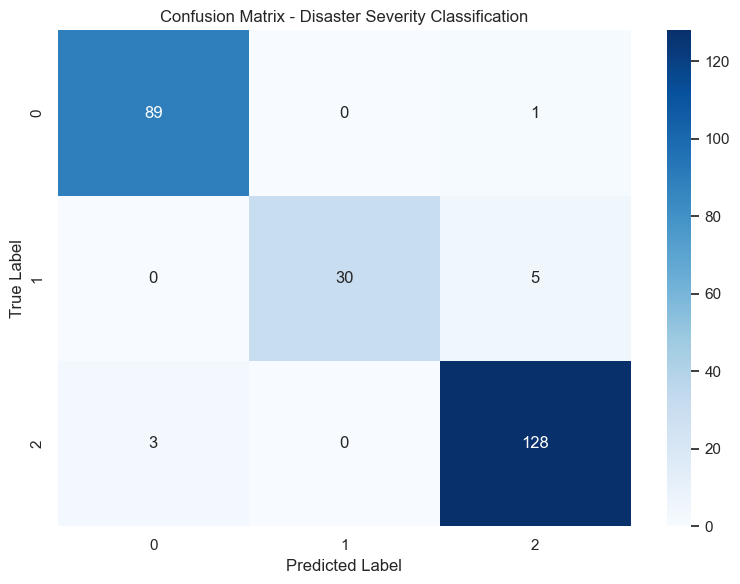

In [21]:
# Use preprocessed data for model training
severity_labels = create_severity_labels(preprocessed_data['processed_data'])
best_model = train_severity_classification_model(preprocessed_data['features'], severity_labels)

> ## REMARK 2:

The following confusion matrix shows the performance of the disaster severity classification model. Here are the key observations:

1. Confusion Matrix:

- The diagonal elements represent the correct predictions for each class.
- The off-diagonal elements represent the misclassifications between classes.
- The matrix shows that the model has a very low number of misclassifications, indicating strong performance.

2. Overall Accuracy: The overall accuracy of the model is 96%, which is quite high. This means the model is able to correctly classify the disaster severity level for 96% of the cases.

- High Severity: The model has excellent performance for the "High" severity class, with a precision of 97% and a recall of 99%.
- Low Severity: The model performs well for the "Low" severity class, with a precision of 100% and a recall of 86%.
- Medium Severity: The model also performs well for the "Medium" severity class, with a precision of 96% and a recall of 98%.




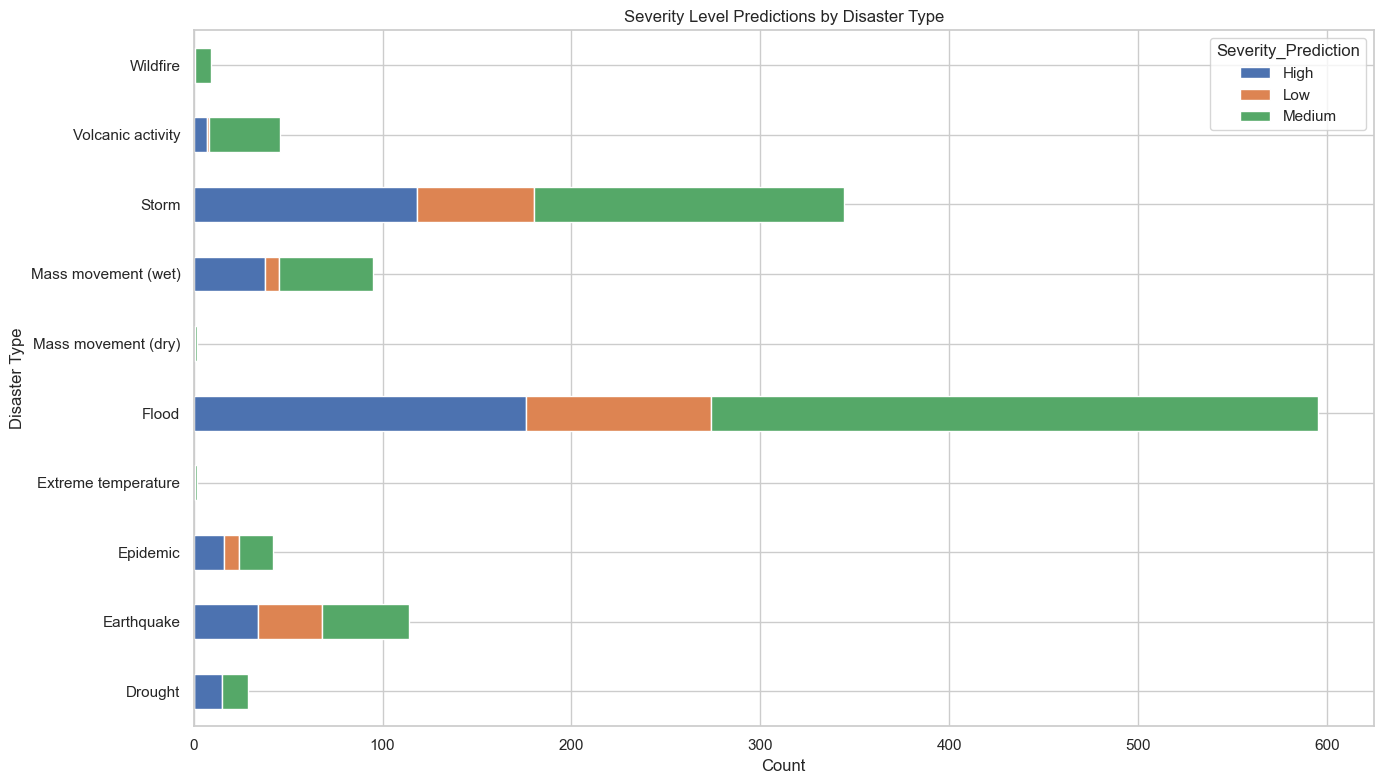

In [22]:
# Predict severity level for entire dataset
df_processed = preprocessed_data['processed_data'].copy()
df_processed['Severity_Prediction'] = best_model.predict(preprocessed_data['features'])

# Add disaster type to dataframe
df_processed['Disaster_Type'] = df['Disaster Type']

# Group by disaster type and count occurrences of each severity level
severity_counts_by_disaster_type = df_processed.groupby('Disaster_Type')['Severity_Prediction'].value_counts().unstack().fillna(0)

# Visualize classification results by disaster type using a horizontal bar chart
severity_counts_by_disaster_type.plot(kind='barh', stacked=True, figsize=(14, 8))
plt.title('Severity Level Predictions by Disaster Type')
plt.xlabel('Count')
plt.ylabel('Disaster Type')
plt.tight_layout()
plt.show()



> ## REMARK 3:

The bar chart that shows the severity level predictions by disaster type. The disaster types include wildfire, volcanic activity, storm, mass movement (wet), mass movement (dry), flood, extreme temperature, epidemic, earthquake, and drought. Some key observations from the chart:

- Wildfire has the highest prediction for medium severity, indicating it is likely to have a moderate impact.
- Storm has the highest predictions for both high and medium severity, suggesting it can have a significant impact.
- Flood has predictions across all three severity levels, with the highest being for medium severity.
- Earthquake has predictions for all three severity levels, with the highest being for medium severity.
- Drought has predictions for both low and medium severity, suggesting it may have a moderate to low impact.


> ## EXPLANATION:

From above, we can interpret the reasons behind the predictions as follows:

- Wildfire: The Southeast Asia region has extensive tropical rainforests that are susceptible to wildfires, especially during the dry season. The prediction of medium severity level suggests that wildfires may occur regularly and cause significant damage.
- Volcanic activity: Many countries in Southeast Asia lie within the Pacific Ring of Fire, an area with high volcanic activity. The predictions ranging from low to medium severity reflect the risk of volcanic events in the region over the 2000-2024 period.
- Storm: Southeast Asia is often affected by powerful storms that can cause substantial harm to people and property. The predictions of both high and medium severity levels indicate that severe storms are expected to occur in the region during this time frame.
- Flood: Flooding is a common occurrence in Southeast Asia due to factors like heavy monsoon rains, poor drainage infrastructure, and proximity to major river systems. The predictions across low, medium, and high severity levels suggest that floods of varying magnitudes are anticipated.
- Earthquake: Seismic activity is also a concern in this earthquake-prone region, with the predictions spanning low to medium severity levels.

The other disaster types, such as mass movement (wet and dry), extreme temperature, epidemic, and drought, also have severity level forecasts that reflect the climatic and geological characteristics of Southeast Asia from 2000 to 2024. Understanding these predictions can help countries in the region prepare appropriate response and mitigation strategies to reduce the impacts of these potential disasters.

## 5. Evaluate

# D. CONCLUSION

# E. REFERENCES